In [31]:
import pandas as pd
from fastai import *
from fastai.vision import *

In [35]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/prakt/try1')
#os.chdir('/content/drive/Shared drives')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [36]:
df = pd.read_csv("./mask_labels.udt.csv")

In [37]:
df

,path,.,imageUrl,output
0,interface,"{""type"":""image_classification"",""allowMultiple""...",NaN,NaN
1,samples.382,NaN,https://scontent-lga3-1.cdninstagram.com/v/t51...,medical_mask
2,samples.384,NaN,https://scontent-lga3-1.cdninstagram.com/v/t51...,medical_mask
3,samples.388,NaN,https://scontent-lga3-1.cdninstagram.com/v/t51...,medical_mask
4,samples.392,NaN,https://instagram.fbed1-2.fna.fbcdn.net/v/t51....,medical_mask
...,...,...,...,...
1610,samples.1344,NaN,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_medical_mask
1611,samples.1348,NaN,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_medical_mask
1612,samples.1349,NaN,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_medical_mask
1613,samples.1351,NaN,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_medical_mask


In [38]:
df = df[df.path.str.contains("samples")]

In [39]:
url_list = [str(a) for a in list(df["imageUrl"])]
open("./images.txt", "w").write("\n".join(url_list))

316721

In [40]:
download_images("./images.txt", "./images", max_pics = 10000)

In [41]:
labels = pd.DataFrame(data={
    "image": (df.index - 1).astype("str").str.zfill(8) + ".jpg",
    "output": df["output"]
})

In [42]:
failed = verify_images("./images", delete=True)

cannot identify image file <_io.BufferedReader name='images/00000002.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000001.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000003.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000005.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000000.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000004.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000007.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000008.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000013.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000011.jpg'>
cannot identify image fil

In [43]:
missing_images = list([img for img in labels["image"] if not(Path("./images") / img).exists()])

In [44]:
labels = labels[~labels["image"].isin(missing_images)]

In [45]:
# Optional: We're going to start with mask/no mask
labels.loc[labels["output"] == "not_medical_mask", "output"] = "mask"
labels.loc[labels["output"] == "medical_mask", "output"] = "mask"

In [46]:
labels

,image,output
110,00000109.jpg,mask
111,00000110.jpg,mask
112,00000111.jpg,mask
113,00000112.jpg,mask
114,00000113.jpg,mask
...,...,...
1610,00001609.jpg,mask
1611,00001610.jpg,mask
1612,00001611.jpg,mask
1613,00001612.jpg,mask


In [47]:
data = ImageDataBunch.from_df(".", labels, folder="images", seed=42,
                              label_col="output", bs=16, size=224,
                              ds_tfms=get_transforms()).normalize(imagenet_stats)

In [48]:
labels

,image,output
110,00000109.jpg,mask
111,00000110.jpg,mask
112,00000111.jpg,mask
113,00000112.jpg,mask
114,00000113.jpg,mask
...,...,...
1610,00001609.jpg,mask
1611,00001610.jpg,mask
1612,00001611.jpg,mask
1613,00001612.jpg,mask


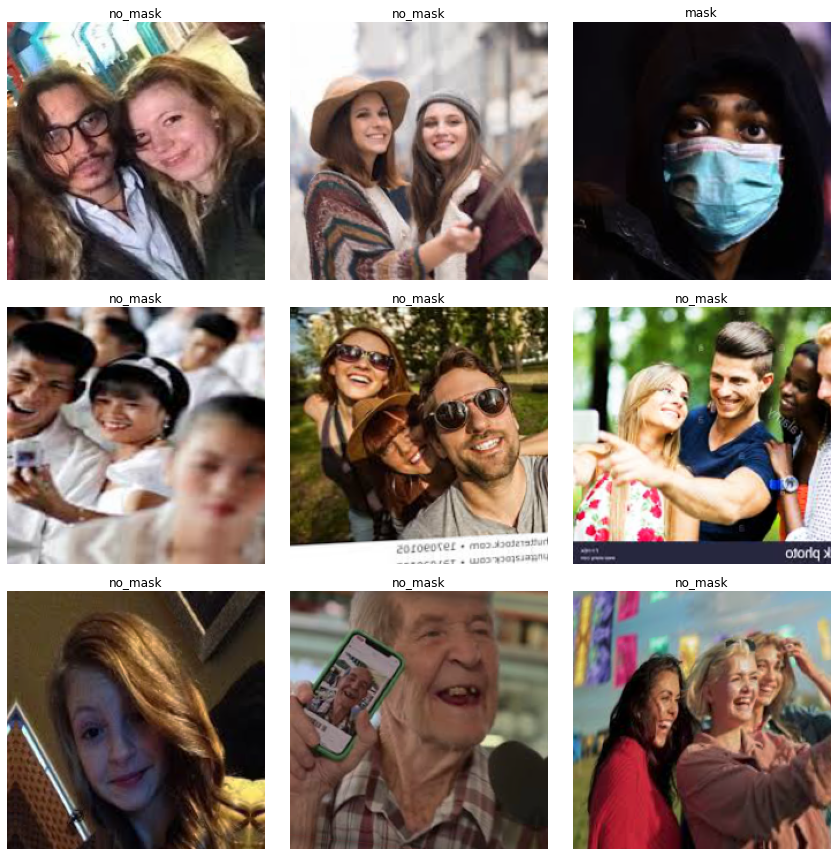

In [49]:
data.show_batch(rows=3)

In [50]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [51]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.705471,0.239829,0.104478,03:10


In [52]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


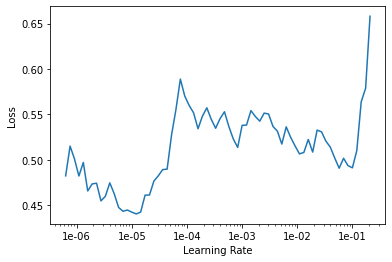

In [53]:
learn.recorder.plot()

In [54]:
learn.save("learn1")

In [55]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.496887,0.192600,0.082090,03:12
1,0.351122,0.127473,0.037313,03:09
2,0.268056,0.141687,0.052239,03:09


In [56]:
learn.save("learn2")

In [57]:
learn.export()

In [58]:
interp = learn.interpret()

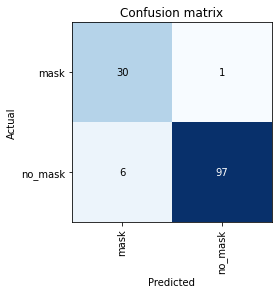

In [59]:
interp.plot_confusion_matrix()

In [60]:
interp.plot_roc_curve()

AttributeError: ignored

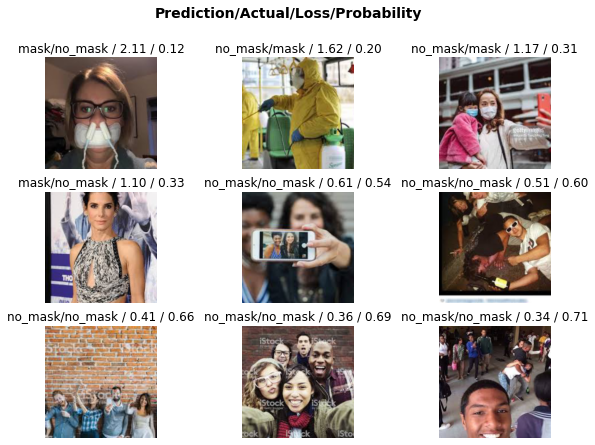

In [129]:
interp.plot_top_losses(9, figsize=(10,7))

In [15]:
tp = 29
tn = 101
fp = 4
fn = 8

In [16]:
accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp + fp)
recall = tp/(tp + fn)
F = 2 * precision * recall / (precision + recall)

In [17]:
 accuracy

0.9154929577464789

In [18]:
precision

0.8787878787878788

In [19]:
recall

0.7837837837837838

In [20]:
F

0.8285714285714285